# Data download

In [1]:
# pobieranie pliku ZIP z Zenodo
!wget https://zenodo.org/record/15548394/files/chronorhetorics-corpus-v1.0-all.zip

--2025-12-17 21:58:54--  https://zenodo.org/record/15548394/files/chronorhetorics-corpus-v1.0-all.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.75, 137.138.52.235, 188.185.43.153, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.75|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/15548394/files/chronorhetorics-corpus-v1.0-all.zip [following]
--2025-12-17 21:58:55--  https://zenodo.org/records/15548394/files/chronorhetorics-corpus-v1.0-all.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1410789198 (1.3G) [application/octet-stream]
Saving to: ‘chronorhetorics-corpus-v1.0-all.zip’

chronorhetorics-cor 100%[===================>]   1.31G  22.3MB/s    in 62s     

2025-12-17 21:59:57 (21.7 MB/s) - ‘chronorhetorics-corpus-v1.0-all.zip’ saved [1410789198/1410789198]



In [2]:
!unzip chronorhetorics-corpus-v1.0-all.zip -d corpus_data

Streaming output truncated to the last 5000 lines.
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-13365.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-11358.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-32438.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-19768.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-4537.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-30405.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-29624.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-0827.json  
  inflating: corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-1735.json  
  inflating: corpus_data/data/inst

In [11]:
ls -1 corpus_data/data/institution/ru-putin-speeches/ | wc -l

33129


In [13]:
cat corpus_data/data/institution/ru-putin-speeches/RU-Kremlin-Putin-Transcripts-8827.json

{
  "id": "RU-Kremlin-Putin-Transcripts-8827",
  "url": "http://en.kremlin.ru/events/president/news/37696",
  "title": "Russian-Chinese talks have confirmed the strategic nature of the two country's bilateral relations",
  "language": "en",
  "date": "2007-03-26",
  "date_iso": "2007-03-26T17:46:00",
  "source_type": "Institution",
  "source_name": "Kremlin",
  "location": "",
  "structured_content": [
    {
      "type": "report",
      "sequence": 1,
      "speaker": "KREMLIN",
      "text": "The Russian and Chinese leaders met six times in 2006, President Vladimir Putin said following a meeting with President of the People’s Republic of China Hu Jintao, in Russia on a state visit. Mr Putin and Mr Hu discussed top issues currently on the international and bilateral agendas. Russia and China intend to continue developing joint projects and expand their partnership in all areas. The two Presidents discussed specific steps to develop cooperation, which are reflected in the Joint Declara

# json analysis

In [3]:
import os
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams["figure.figsize"] = (10, 5)

BASE_PATH = "/content/corpus_data/data/institution/ru-putin-speeches"

files = sorted(os.listdir(BASE_PATH))

records = []
all_text = []

for fname in files:
    with open(os.path.join(BASE_PATH, fname), encoding="utf-8") as f:
        data = json.load(f)

        records.append({
            "id": data.get("id"),
            "date": data.get("date"),
            "language": data.get("language"),
            "title": data.get("title"),
            "num_blocks": len(data.get("structured_content", []))
        })

        for block in data.get("structured_content", []):
            all_text.append(block.get("text", ""))

df = pd.DataFrame(records)

print("Number of docs:", len(df))
print("\languages:")
print(df["language"].value_counts())


<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2971885074.py:35: SyntaxWarning: invalid escape sequence '\l'
  print("\languages:")


Number of docs: 33129
\languages:
language
en    33129
Name: count, dtype: int64


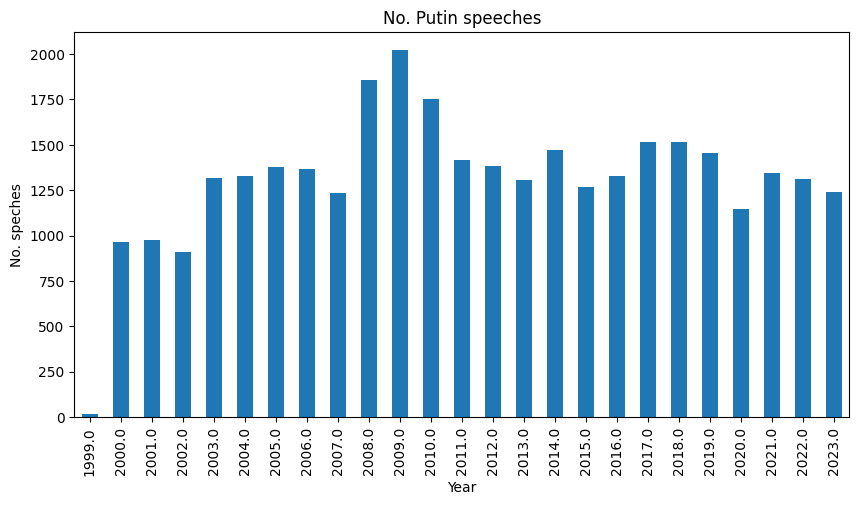

In [20]:
df["year"] = pd.to_datetime(df["date"], errors="coerce").dt.year

year_counts = df["year"].value_counts().sort_index()

year_counts.plot(kind="bar")
plt.title("No. Putin speeches")
plt.xlabel("Year")
plt.ylabel("No. speches")
plt.show()


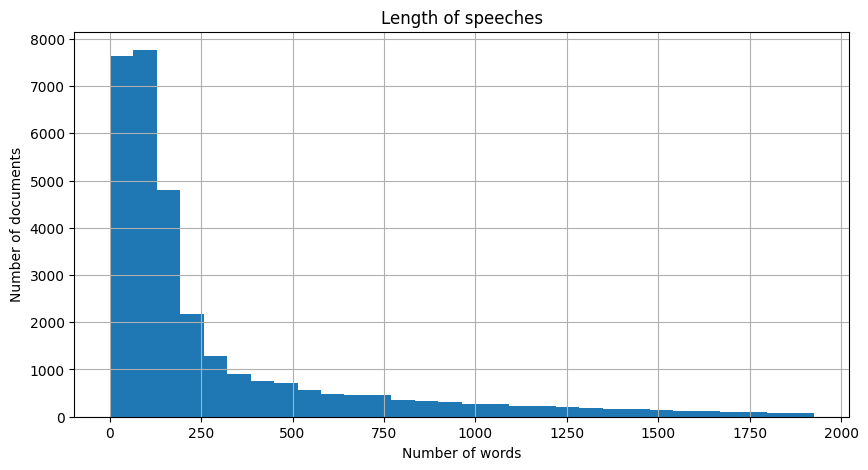

In [9]:
import numpy as np

df["text_length"] = [
    len(" ".join(
        block.get("text", "")
        for block in json.load(
            open(os.path.join(BASE_PATH, f), encoding="utf-8")
        ).get("structured_content", [])
    ).split())
    for f in files
]

upper = df["text_length"].quantile(0.95)
df_clipped = df[df["text_length"] <= upper]

df_clipped["text_length"].hist(bins=30)
plt.title("Length of speeches")
plt.xlabel("Number of words")
plt.ylabel("Number of documents")
plt.show()

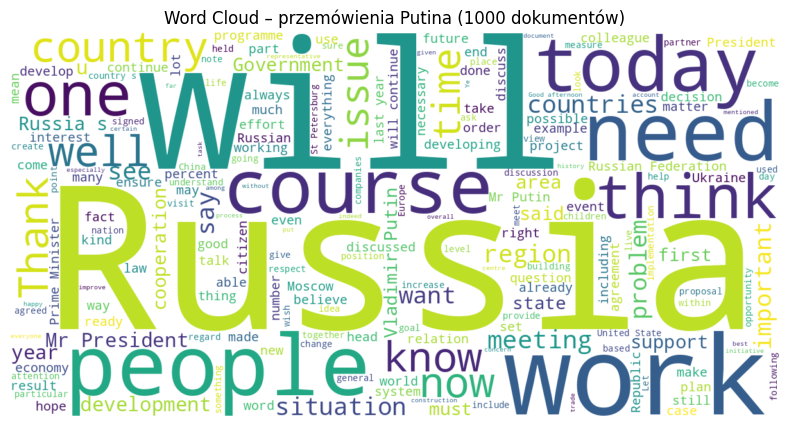

In [22]:
text_blob = " ".join(all_text)

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    max_words=200
).generate(text_blob)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – putin's top words")
plt.show()

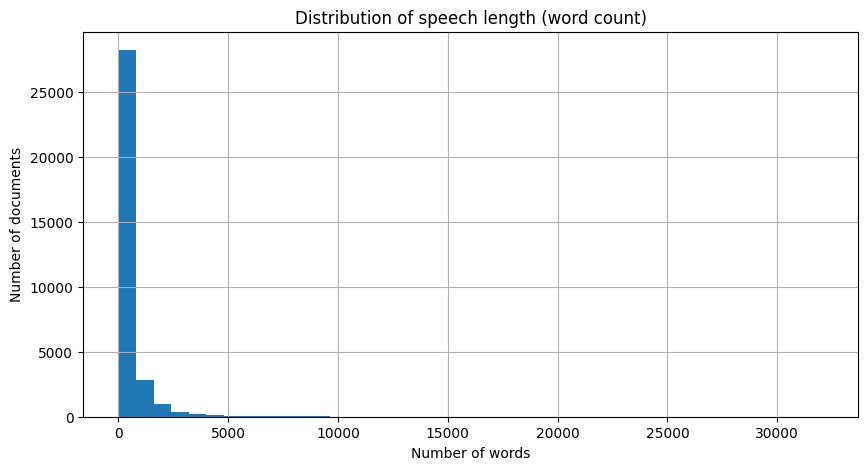

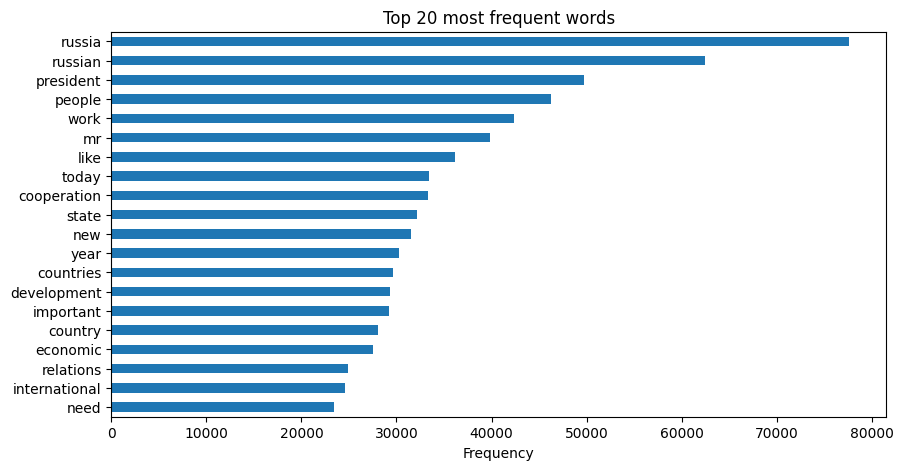

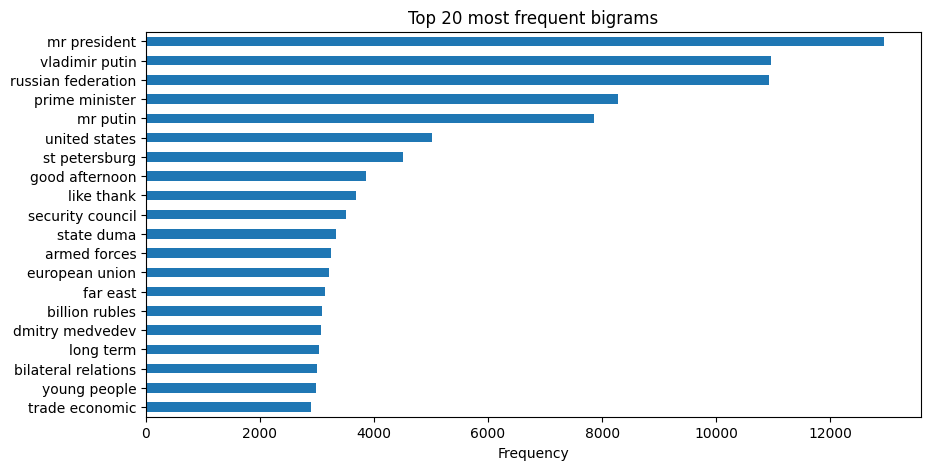

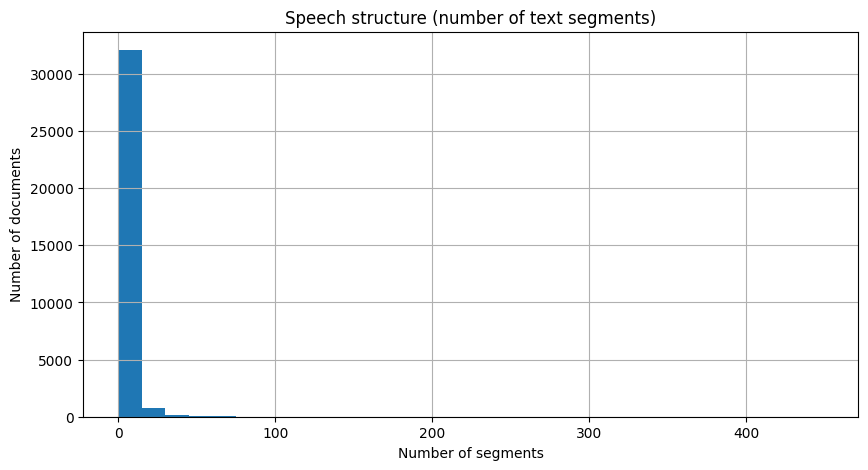

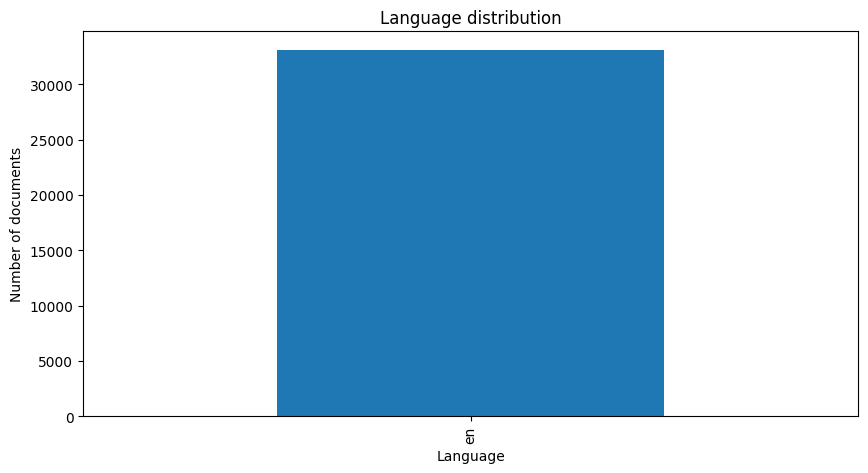

===== SUMMARY =====
Documents analyzed: 33129
Average speech length: 486 words
Median speech length: 140 words


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# ======================
# 3. SPEECH LENGTH DISTRIBUTION
# ======================
df["text_length"].hist(bins=40)
plt.title("Distribution of speech length (word count)")
plt.xlabel("Number of words")
plt.ylabel("Number of documents")
plt.show()

# ======================
# 4. TOP 20 MOST FREQUENT WORDS
# ======================
vectorizer = CountVectorizer(
    stop_words="english",
    max_features=20
)

X = vectorizer.fit_transform(all_text)
word_frequencies = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

pd.Series(word_frequencies, index=words).sort_values().plot(kind="barh")
plt.title("Top 20 most frequent words")
plt.xlabel("Frequency")
plt.show()

# ======================
# 5. TOP 20 MOST FREQUENT BIGRAMS
# ======================
bigram_vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2, 2),
    max_features=20
)

X2 = bigram_vectorizer.fit_transform(all_text)
bigram_frequencies = X2.sum(axis=0).A1
bigrams = bigram_vectorizer.get_feature_names_out()

pd.Series(bigram_frequencies, index=bigrams).sort_values().plot(kind="barh")
plt.title("Top 20 most frequent bigrams")
plt.xlabel("Frequency")
plt.show()

# ======================
# 6. TEXT STRUCTURE (NUMBER OF SEGMENTS)
# ======================
df["num_blocks"].hist(bins=30)
plt.title("Speech structure (number of text segments)")
plt.xlabel("Number of segments")
plt.ylabel("Number of documents")
plt.show()

# ======================
# 7. LANGUAGE DISTRIBUTION
# ======================
df["language"].value_counts().plot(kind="bar")
plt.title("Language distribution")
plt.xlabel("Language")
plt.ylabel("Number of documents")
plt.show()

# ======================
# SUMMARY STATISTICS
# ======================
print("===== SUMMARY =====")
print("Documents analyzed:", len(df))
print("Average speech length:", int(df['text_length'].mean()), "words")
print("Median speech length:", int(df['text_length'].median()), "words")

How many speakers are there and distribution

#

Top speakers:
speaker
PRESIDENT PUTIN                        29766
KREMLIN                                27391
Q                                       6673
PRESIDENT MEDVEDEV                      3675
Dmitry Medvedev                          900
Andrei Vandenko                          441
VLADIMIR PUTIN                           258
PRESIDENT OF RUSSIA DMITRY MEDVEDEV      205
FYODOR LUKYANOV                          184
ANDREI KOSTIN                            176
GERMAN GREF                              155
DMITRY MEDVEDEV                          148
Dmitry Peskov                            145
Megyn Kelly                              142
DEFENCE MINISTER SERGEI SHOIGU           141
Name: count, dtype: int64


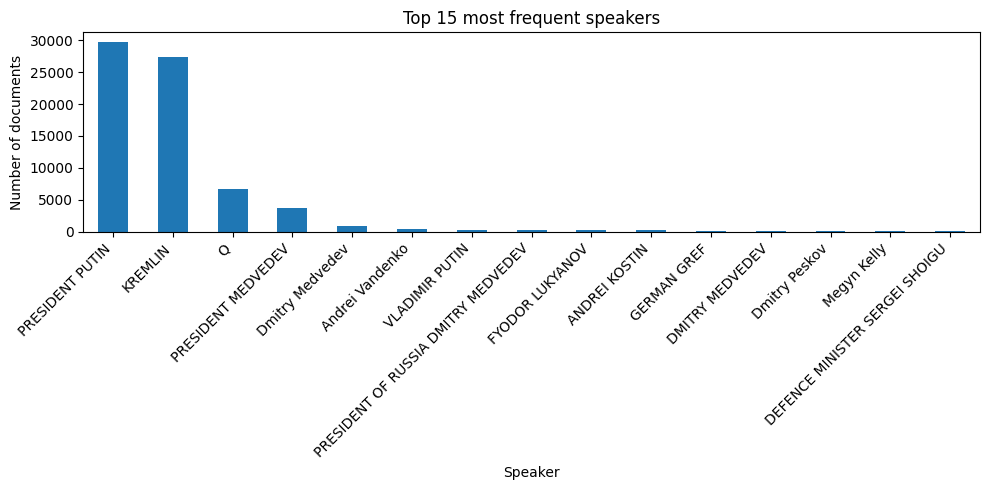

In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

BASE_PATH = "corpus_data/data/institution/ru-putin-speeches"

speakers = []

for root, dirs, files in os.walk(BASE_PATH):
    for file in files:
        if file.endswith(".json"):
            path = os.path.join(root, file)
            try:
                with open(path, encoding="utf-8") as f:
                    data = json.load(f)

                if data.get("speaker"):
                    speakers.append(data["speaker"])

                for block in data.get("structured_content", []):
                    if block.get("speaker"):
                        speakers.append(block["speaker"])

            except Exception:
                continue

df = pd.DataFrame(speakers, columns=["speaker"])
speaker_counts = df["speaker"].value_counts()

TOP_N = 15
top_speakers = speaker_counts.head(TOP_N)

print("Top speakers:")
print(top_speakers)

top_speakers.plot(kind="bar")
plt.title(f"Top {TOP_N} most frequent speakers")
plt.xlabel("Speaker")
plt.ylabel("Number of documents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()